<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_002_2_ml/_002_weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기상청 날씨 데이터 분석하기

## 데이터 불러오기

- 컬럼 설정
- 사람을 위한 월 시작 row 제거
  - 12월 31일 -> | start: 201912 | -> 1월 1일

In [84]:
import pandas as pd
path = 'https://raw.githubusercontent.com/wiv33/A-Learning-python/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_002_2_ml/data'

df_precipitation = pd.read_csv(path + '/precipitation_201910_202009.csv')
df_precipitation.columns = ['day', 'hour', 'precipitation']
df_precipitation.dropna(axis=0, inplace=True)

df_direction_of_the_wind = pd.read_csv(path + '/direction_of_the_wind_201910_202009.csv')
df_direction_of_the_wind.columns = ['day', 'hour', 'wind']
df_direction_of_the_wind.dropna(axis=0, inplace=True)

df_precipitation_shape = pd.read_csv(path + '/precipitation_shape_201910_202009.csv')
df_precipitation_shape.columns = ['day', 'hour', 'precipitation_shape']
df_precipitation_shape.dropna(axis=0, inplace=True)

df_temperature = pd.read_csv(path + '/temperature_201910_202009.csv')
df_temperature.columns = ['day', 'hour', 'temperature'] 
df_temperature.dropna(axis=0, inplace=True)

df_humidity = pd.read_csv(path + '/humidity_201910_202009.csv')
df_humidity.columns = ['day', 'hour', 'humidity']
df_humidity.dropna(axis=0, inplace=True)

df_wind_speed = pd.read_csv(path + '/%EC%9B%94%EA%B3%A1%EC%A0%9C1%EB%8F%99_%ED%92%8D%EC%86%8D_wind_speed_201910_202009.csv')
df_wind_speed.columns = ['day', 'hour', 'wind_speed']
df_wind_speed.dropna(axis=0, inplace=True)


nan row 확인

In [85]:
df_test = pd.read_csv(path + '/temperature_201910_202009.csv')
# df_test.iloc[3318:3340, :]

In [86]:
df_test2 = pd.read_csv(path + '/precipitation_shape_201910_202009.csv')
# df_test2.iloc[3318:3340, :]

In [87]:
df_test3 = pd.read_csv(path + '/precipitation_201910_202009.csv')
# df_test3.iloc[3318:3340, :]

In [88]:
df_test4 = pd.read_csv(path + '/precipitation_201910_202009.csv')
df_test4.columns = ['day', 'hour', 'precipitation']
df_test4.head()



,day,hour,precipitation
0,1,0.0,0.0
1,1,100.0,0.0
2,1,200.0,0.0
3,1,300.0,0.0
4,1,400.0,0.0


In [89]:
df_date_test4 = pd.date_range('2019-10-01', periods=366)
df_date_test4

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', length=366, freq='D')

nan 형태 확인 후 제거

In [90]:
del df_test
del df_test2
del df_test3
del df_date_test4

### 다섯 개의 DataFrame shape 확인하기

In [91]:
df_direction_of_the_wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     8784 non-null   object 
 1   hour    8784 non-null   float64
 2   wind    8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [92]:
df_precipitation_shape.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day                  8784 non-null   object 
 1   hour                 8784 non-null   float64
 2   precipitation_shape  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [93]:
df_humidity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       8784 non-null   object 
 1   hour      8784 non-null   float64
 2   humidity  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [94]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          8784 non-null   object 
 1   hour         8784 non-null   float64
 2   temperature  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


8784 row와 3개의 컬럼 중 세 번째 컬럼을 하나로 만들면 될 것.

### Date 형식의 column을 추가

In [95]:
import numpy as np 
df_day_idx = pd.date_range('2019-10-01', periods=366)

dates = [[str(day).split("T")[0]] * 24 for day in df_day_idx.values]
len(np.array(dates).flatten())

8784

In [96]:
df_precipitation.head()

,day,hour,precipitation
0,1,0.0,0.0
1,1,100.0,0.0
2,1,200.0,0.0
3,1,300.0,0.0
4,1,400.0,0.0


## 각 데이터 프레임 하나로 합치기

강수, 강수형태, 습도, 기온, 풍향, 풍속

In [97]:
# df_precipitation.insert(0, column='date', value=np.array(dates).flatten())

# df = df_precipitation.iloc[:, [0, 2]]
# df['precipitation_강수'] = df_precipitation.precipitation
# df['precipitation_shape_강수형태'] = df_precipitation_shape['precipitation_shape']
# df['temperature_기온'] = df_temperature['temperature']
# df['humidity_습도'] = df_humidity.humidity
# df['wind_풍향'] = df_direction_of_the_wind.wind
# df['wind_spped_풍속'] = df_wind_spped.wind_speed


In [98]:
df_precipitation.insert(0, column='date', value=np.array(dates).flatten())

df = df_precipitation.iloc[:, [0, 2]]
df['precipitation'] = df_precipitation.precipitation
df['precipitation_shape'] = df_precipitation_shape['precipitation_shape']
df['temperature'] = df_temperature['temperature']
df['humidity'] = df_humidity.humidity
df['wind'] = df_direction_of_the_wind.wind
df['wind_speed'] = df_wind_speed.wind_speed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### merge 결과 확인하기

In [99]:
df.head()

,date,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
0,2019-10-01,0.0,0.0,0.0,23.900000,63.0,29.0,0.8
1,2019-10-01,100.0,0.0,0.0,25.400000,60.0,183.0,1.6
2,2019-10-01,200.0,0.0,0.0,26.799999,56.0,122.0,1.6
3,2019-10-01,300.0,0.0,0.0,26.799999,57.0,64.0,1.9
4,2019-10-01,400.0,0.0,0.0,27.400000,59.0,127.0,1.5


## 시간 데이터 타입 변환

- 기존 24시의 표현 변경

  0.0, 100.0, 200.0

  0, 1, 2, 3

- ~~day int로 변경~~
- day를 datetime 형식으로 변경.

시각화할 때 구분이 가지 않음.


In [100]:
def hour_regulation(hour: float):
  return int(hour / 100)

In [101]:
df.hour = df.hour.apply(hour_regulation)

# df.day = df.day.apply(lambda x: int(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 8784 non-null   object 
 1   hour                 8784 non-null   int64  
 2   precipitation        8784 non-null   float64
 3   precipitation_shape  8784 non-null   float64
 4   temperature          8784 non-null   float64
 5   humidity             8784 non-null   float64
 6   wind                 8784 non-null   float64
 7   wind_speed           8784 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 617.6+ KB


In [102]:
df.describe()

,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.500000,0.195924,0.061589,14.031364,64.886043,204.206398,1.899841
std,6.922581,1.324470,0.261299,9.986910,20.409870,120.910504,1.220649
min,0.000000,-1.000000,-1.000000,-50.000000,-1.000000,-1.000000,-1.000000
25%,5.750000,0.000000,0.000000,5.700000,50.000000,82.000000,1.000000
50%,11.500000,0.000000,0.000000,14.500000,65.000000,239.000000,1.600000
75%,17.250000,0.000000,0.000000,22.700001,82.000000,314.000000,2.600000
max,23.000000,43.000000,3.000000,36.700001,97.000000,360.000000,12.800000


### 이상 데이터 확인

강수, 강수 형태, 습도, 풍향, 풍속의 최소 값이 `-1`이고

기온이 `-50도`인 것은 정규화가 필요하다고 판단.

In [103]:
df[df['temperature'] == -50].index

Int64Index([514, 1057, 2271, 3468, 3475, 3481, 4183, 4661, 5487], dtype='int64')

- 이상 데이터의 인덱스 확인

### 이상 데이터 정규화

- 습도와 기온은 +-2일 값의 평균으로 적용
- 나머지 값은 0으로 적용

In [104]:
for x in df[df['wind'] <= -1].index:
  seq = int(x)
  df['temperature'][seq] = np.mean((df.iloc[seq-2:seq, 4], df.iloc[seq+1:seq+3, 4]))
  df['humidity'][seq] = np.mean((df.iloc[seq-2:seq, 5], df.iloc[seq+1:seq+3, 5]))
  df['wind_speed'][seq] = 0.0
  df['precipitation_shape'][seq] = 0.0
  df['precipitation'][seq] = 0.0
  df['wind'][seq] = 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [105]:
df[df['humidity'] <= 10.0]

,date,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
5291,2020-05-08,4,0.0,0.0,26.1,10.0,136.0,2.5


In [106]:
df[df['temperature'] <= -50]

,date,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed


In [107]:
df.iloc[1055: 1057, :]

,date,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
1056,2019-11-13,23,0.0,0.0,0.40,24.00,2.0,3.2
1057,2019-11-14,0,0.0,0.0,-10.55,21.25,0.0,0.0


In [108]:
df[df['wind'] <= -1]

,date,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed


In [109]:
df.describe()

,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.500000,0.196949,0.062614,14.088300,64.937642,204.207536,1.900979
std,6.922581,1.323931,0.259086,9.784082,20.315112,120.908576,1.218408
min,0.000000,0.000000,0.000000,-12.150000,10.000000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,5.800000,50.000000,82.000000,1.000000
50%,11.500000,0.000000,0.000000,14.500000,65.000000,239.000000,1.600000
75%,17.250000,0.000000,0.000000,22.700001,82.000000,314.000000,2.600000
max,23.000000,43.000000,3.000000,36.700001,97.000000,360.000000,12.800000


In [110]:
df[df['precipitation_shape'] == 3.]

,date,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
2332,2020-01-06,1,0.0,3.0,4.0,53.0,87.0,0.6
3035,2020-02-04,7,0.0,3.0,1.7,86.0,224.0,3.3
3039,2020-02-04,11,0.0,3.0,-1.0,77.0,316.0,5.6
3318,2020-02-16,2,0.0,3.0,-0.3,81.0,261.0,2.9
3319,2020-02-16,3,0.0,3.0,-0.2,80.0,248.0,3.4
3322,2020-02-16,6,0.0,3.0,-0.8,68.0,287.0,6.1
3323,2020-02-16,7,0.0,3.0,-1.8,76.0,280.0,4.5
3330,2020-02-16,14,0.0,3.0,-3.3,75.0,249.0,2.3
3332,2020-02-16,16,0.0,3.0,-3.6,84.0,281.0,1.8
3338,2020-02-16,22,0.0,3.0,-6.2,74.0,340.0,2.1


# 시각화

In [111]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 시간에 따른 기온의 변화

In [112]:
df.head(25)

,date,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
0,2019-10-01,0,0.0,0.0,23.900000,63.0,29.0,0.8
1,2019-10-01,1,0.0,0.0,25.400000,60.0,183.0,1.6
2,2019-10-01,2,0.0,0.0,26.799999,56.0,122.0,1.6
3,2019-10-01,3,0.0,0.0,26.799999,57.0,64.0,1.9
4,2019-10-01,4,0.0,0.0,27.400000,59.0,127.0,1.5
5,2019-10-01,5,0.0,0.0,27.200001,59.0,63.0,1.6
6,2019-10-01,6,0.0,0.0,26.700001,65.0,83.0,2.1
7,2019-10-01,7,0.0,0.0,26.799999,66.0,77.0,1.1
8,2019-10-01,8,0.0,0.0,26.000000,70.0,121.0,1.9
9,2019-10-01,9,0.0,0.0,25.600000,74.0,117.0,1.4


In [113]:
df.tail()

,date,hour,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
8790,2020-09-30,19,0.0,0.0,17.000000,75.0,325.0,0.6
8791,2020-09-30,20,0.0,0.0,16.900000,77.0,344.0,0.6
8792,2020-09-30,21,0.0,0.0,17.400000,72.0,102.0,0.7
8793,2020-09-30,22,0.0,0.0,18.100000,70.0,82.0,1.1
8794,2020-09-30,23,0.0,0.0,18.799999,68.0,62.0,1.0


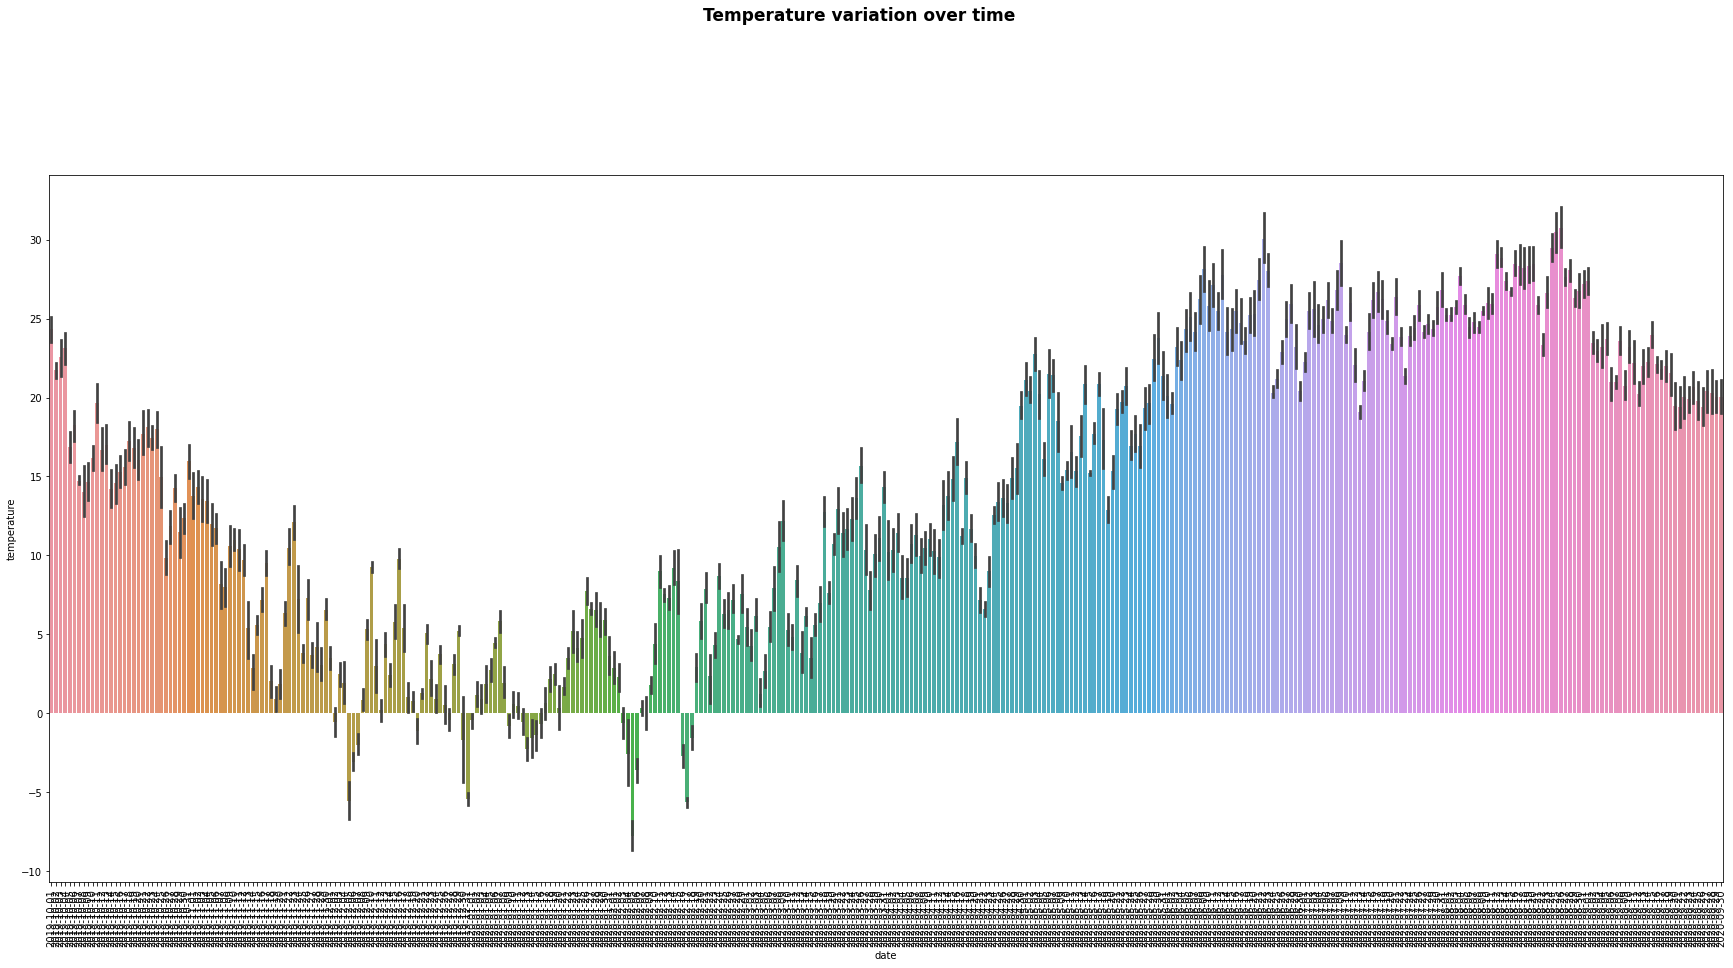

In [114]:
plt.figure(figsize=(30, 13))


plt.xlabel('day')
plt.ylabel('temperature')

# figure title
plt.suptitle('Temperature variation over time',
             fontsize=17,
             fontweight='bold',
             x=.5,
             y=1.06,
             ha='center' # horizontal alignment
             )

plt.xticks(rotation=90)
sns.barplot(x=df['date'], y=df['temperature'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


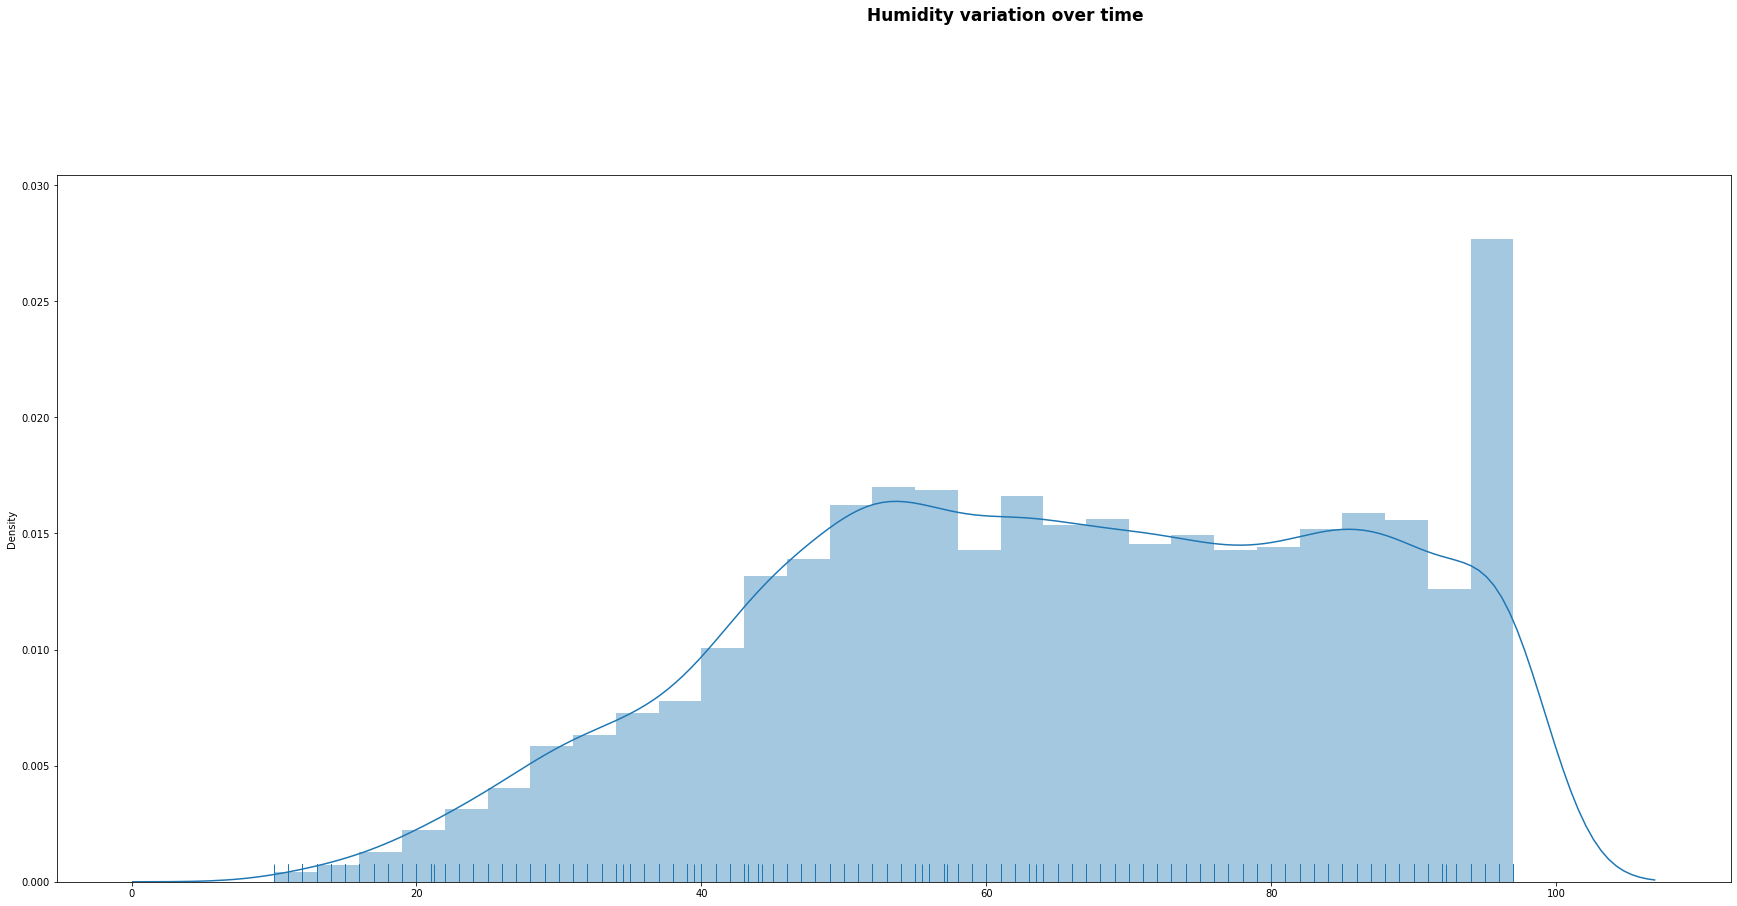

In [115]:
plt.figure(figsize=(30, 13))
plt.suptitle('Humidity variation over time',
             fontsize=17,
             fontweight='bold',
             x=.5,
             y=1.06,
             ha='left'  # Horizontal aligment
             )

sns.distplot(x=df[['humidity']],
             hist=True,
             kde=True,
             rug=True)

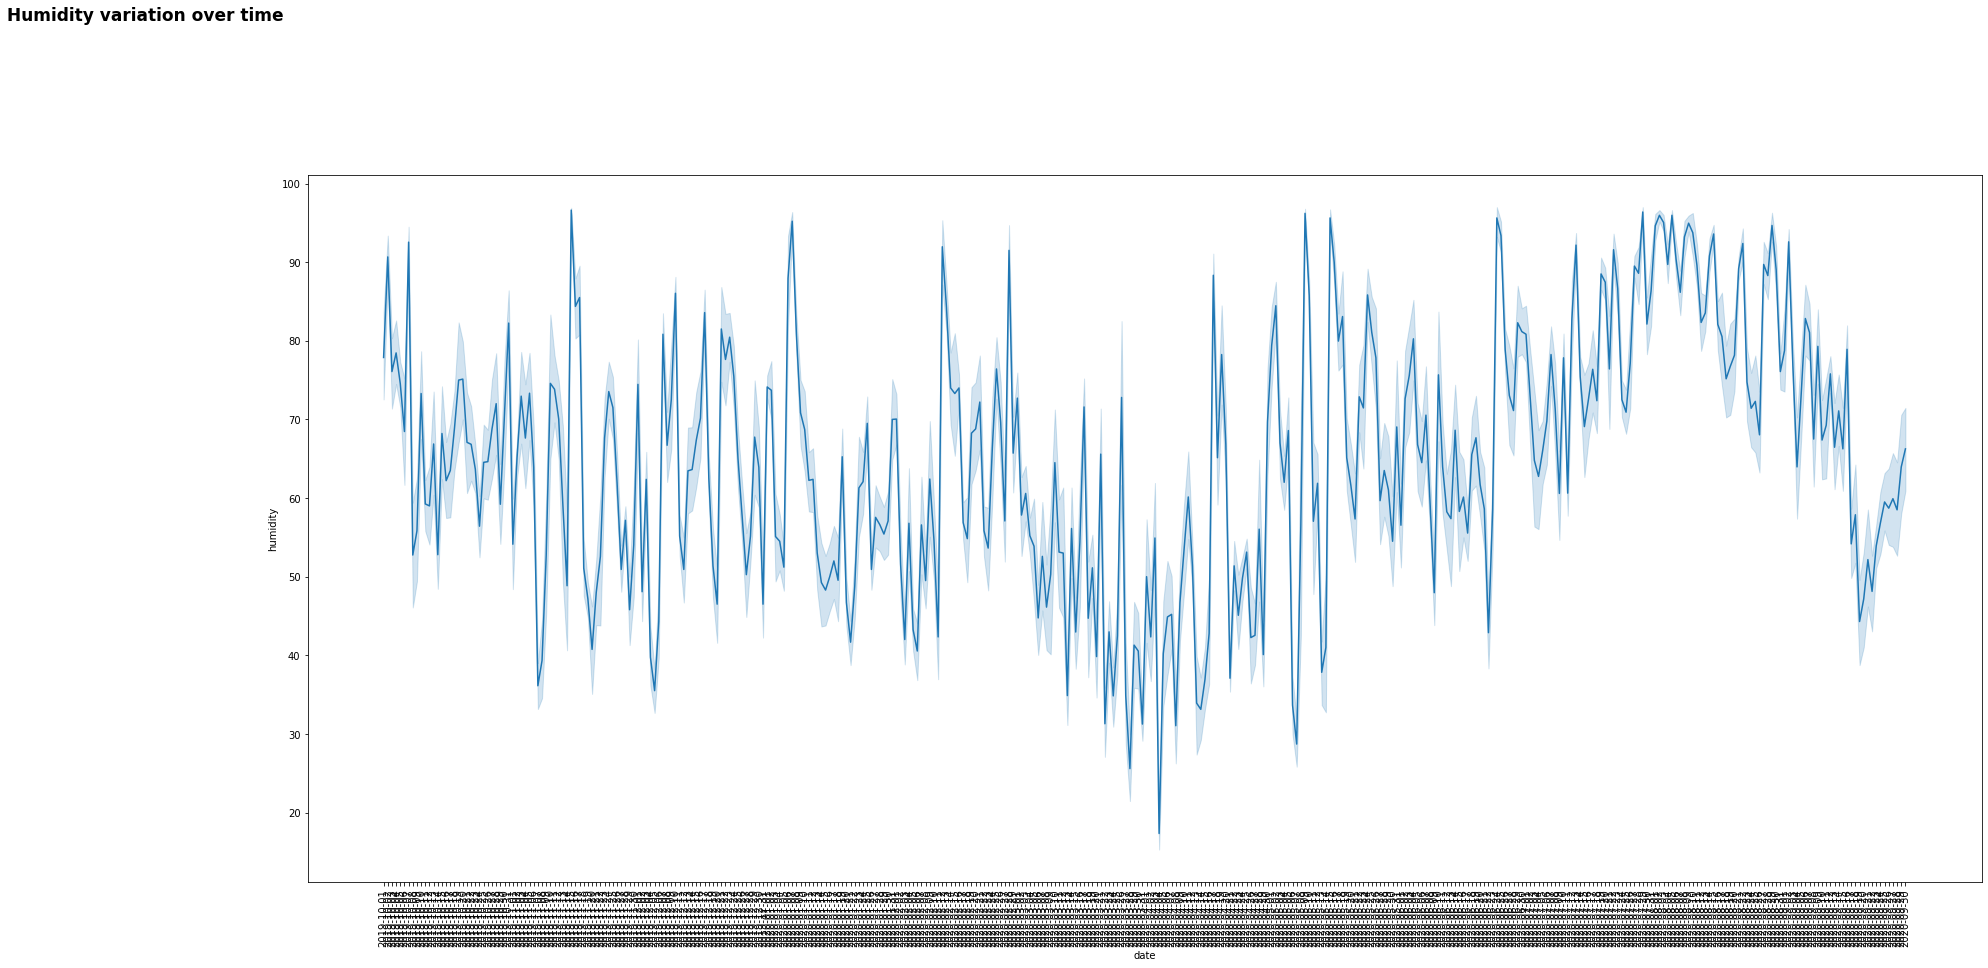

In [116]:
plt.figure(figsize=(30, 13))
plt.suptitle('Humidity variation over time',
             fontsize=17,
             fontweight='bold',
             x=.05,
             y=1.06,
             ha='center'  # Horizontal aligment
             )
plt.xticks(rotation=90)
sns.lineplot(x=df['date'], y=df['humidity'])

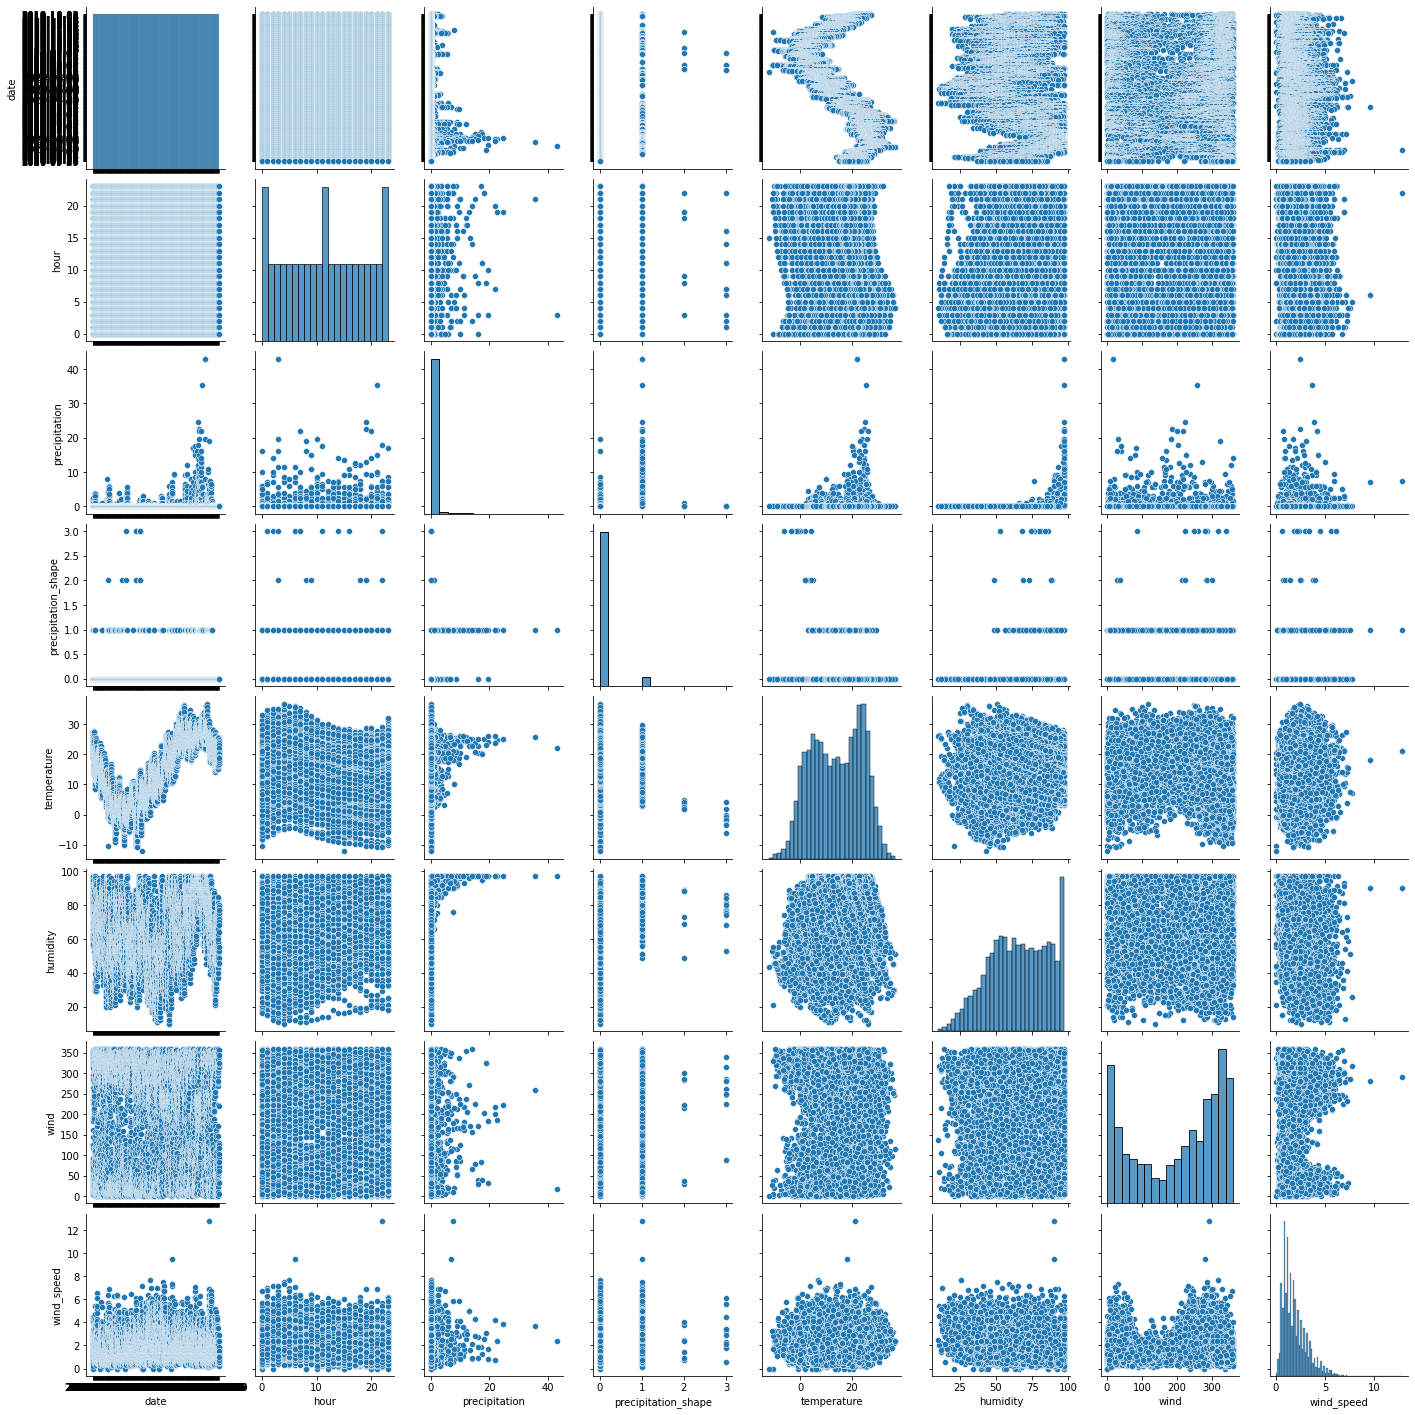

In [117]:
sns.pairplot(df,
             x_vars=df.columns,
             y_vars=df.columns)
plt.show()

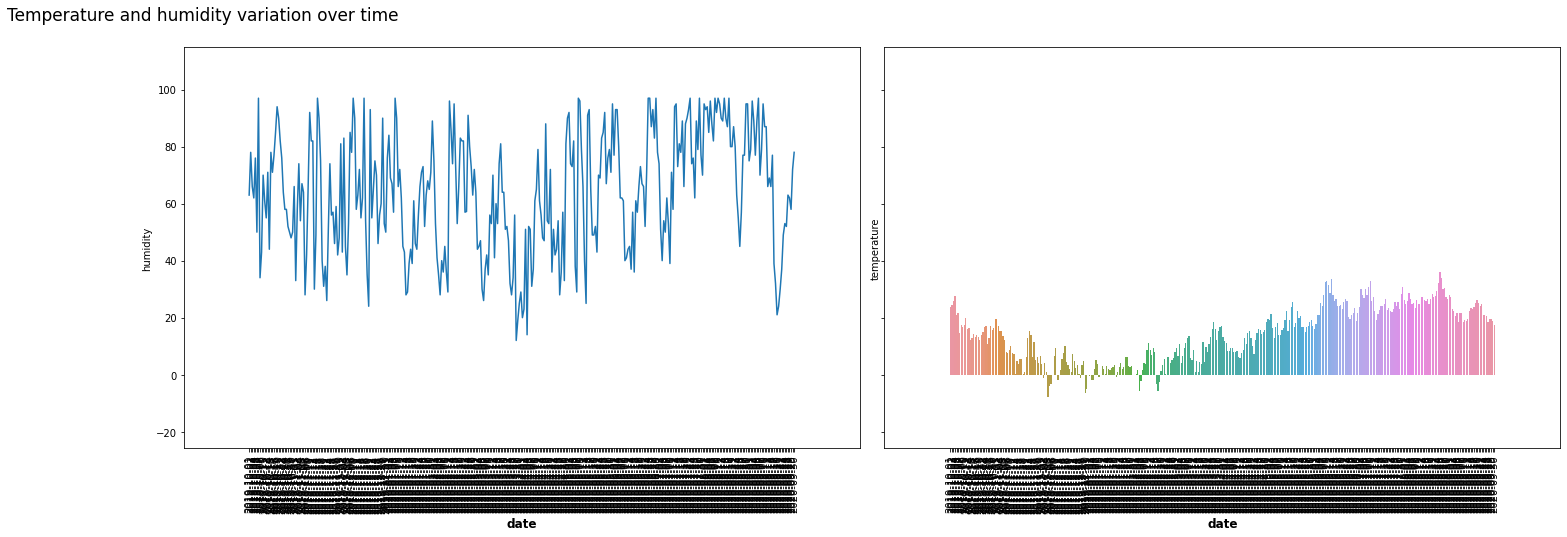

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.lineplot(x='date',
            y='humidity',
            data=df.iloc[0::25, :],
            ax=axes[0])

sns.barplot(x='date',
            y='temperature',
            data=df.iloc[0::25, :],
            ax=axes[1])

for idx, ax in enumerate(axes):
  ax.margins(.12, .17)
  ax.xaxis.label.set_size(12)
  ax.xaxis.label.set_weight('bold')
  plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=90)

plt.suptitle('Temperature and humidity variation over time',
             fontsize=17,
             x=.05,
             y=1.06,
             ha='center')

plt.tight_layout()
plt.show()


## 평균 온도

평균 온도: 14도, 평균 습도: 64%
최대 온도: 36.700001, 최대 습도: 97.0
최소 온도: -12.15, 최소 습도: 10.0
중간 온도: 14.5, 중간 습도: 65.0
온도 표준편차: 9.783524633751451, 습도 표준편차: 20.31395530326022


,hour,precipitation,temperature,humidity,wind_speed
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.500000,0.196949,14.088300,64.937642,1.900979
std,6.922581,1.323931,9.784082,20.315112,1.218408
min,0.000000,0.000000,-12.150000,10.000000,0.000000
25%,5.750000,0.000000,5.800000,50.000000,1.000000
50%,11.500000,0.000000,14.500000,65.000000,1.600000
75%,17.250000,0.000000,22.700001,82.000000,2.600000
max,23.000000,43.000000,36.700001,97.000000,12.800000


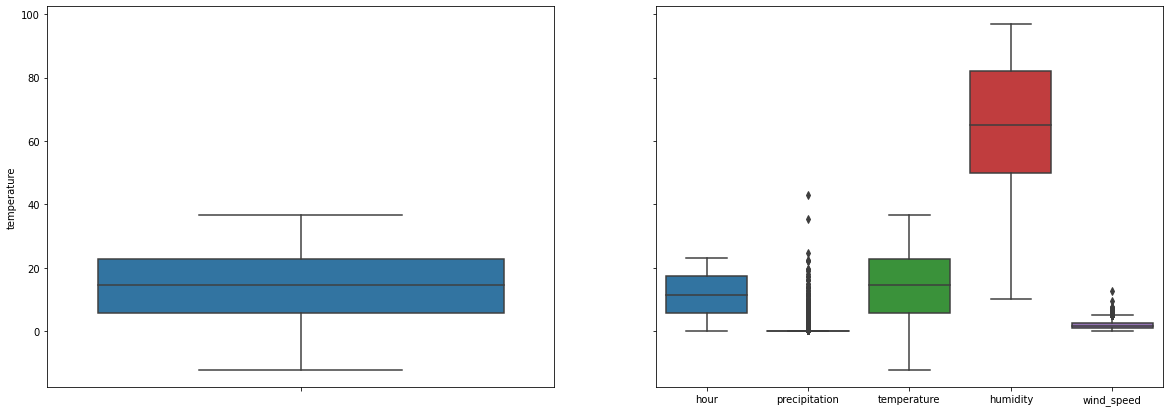

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

df_boxplot = df.copy()
df_boxplot.drop(columns=['wind', 'precipitation_shape'], inplace=True)

sns.boxplot(y=df.temperature, ax=axes[0])
sns.boxplot(data=df_boxplot, ax=axes[1])
print(f'평균 온도: {int(np.mean(df.temperature))}도, 평균 습도: {int(np.mean(df.humidity))}%')
print(f'최대 온도: {np.max(df.temperature)}, 최대 습도: {np.max(df.humidity)}')
print(f'최소 온도: {np.min(df.temperature)}, 최소 습도: {np.min(df.humidity)}')
print(f'중간 온도: {np.median(df.temperature)}, 중간 습도: {np.median(df.humidity)}')
print(f'온도 표준편차: {np.std(df.temperature)}, 습도 표준편차: {np.std(df.humidity)}')
df_boxplot.describe()

## 평균 습도

64.93764230418944

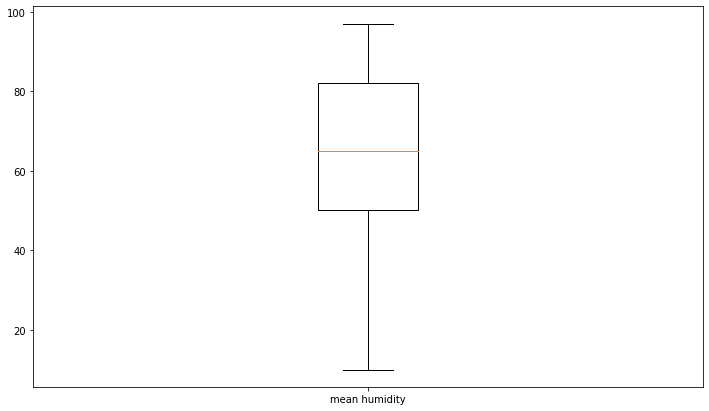

In [120]:
plt.figure(figsize=(12, 7))
plt.boxplot(df.humidity)
plt.xticks([1], ['mean humidity'])
np.mean(df.humidity)

## 기온과 풍속의 상관관계

Text(0.5, 0.98, 'The currelation between temperature and wind speed and hour, temperature')

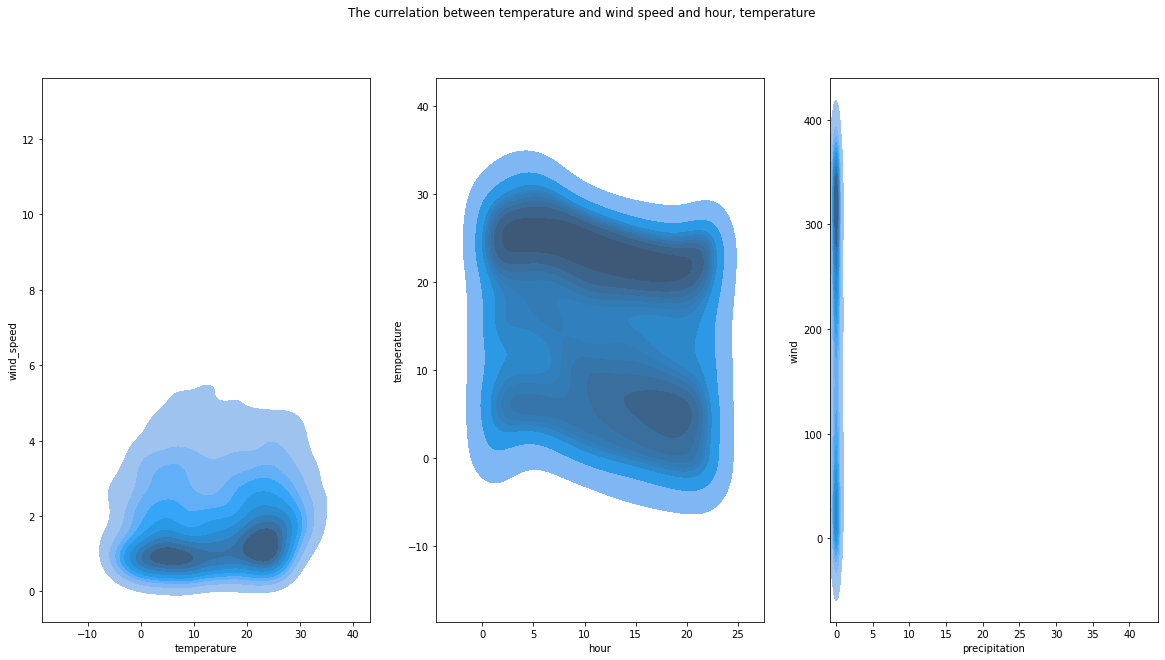

In [192]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.kdeplot(x=df['temperature'],
            y=df['wind_speed'],
            shade=True,
            ax=ax[0])

sns.kdeplot(x=df['hour'],
            y=df['temperature'],
            shade=True,
            ax=ax[1])


sns.kdeplot(x=df['precipitation'],
            y=df['wind'],
            shade=True,
            ax=ax[2])

plt.suptitle('The currelation between temperature and wind speed and hour, temperature')

## 시간과 기온

## 기온과 습도와 풍속의 변화 시각화

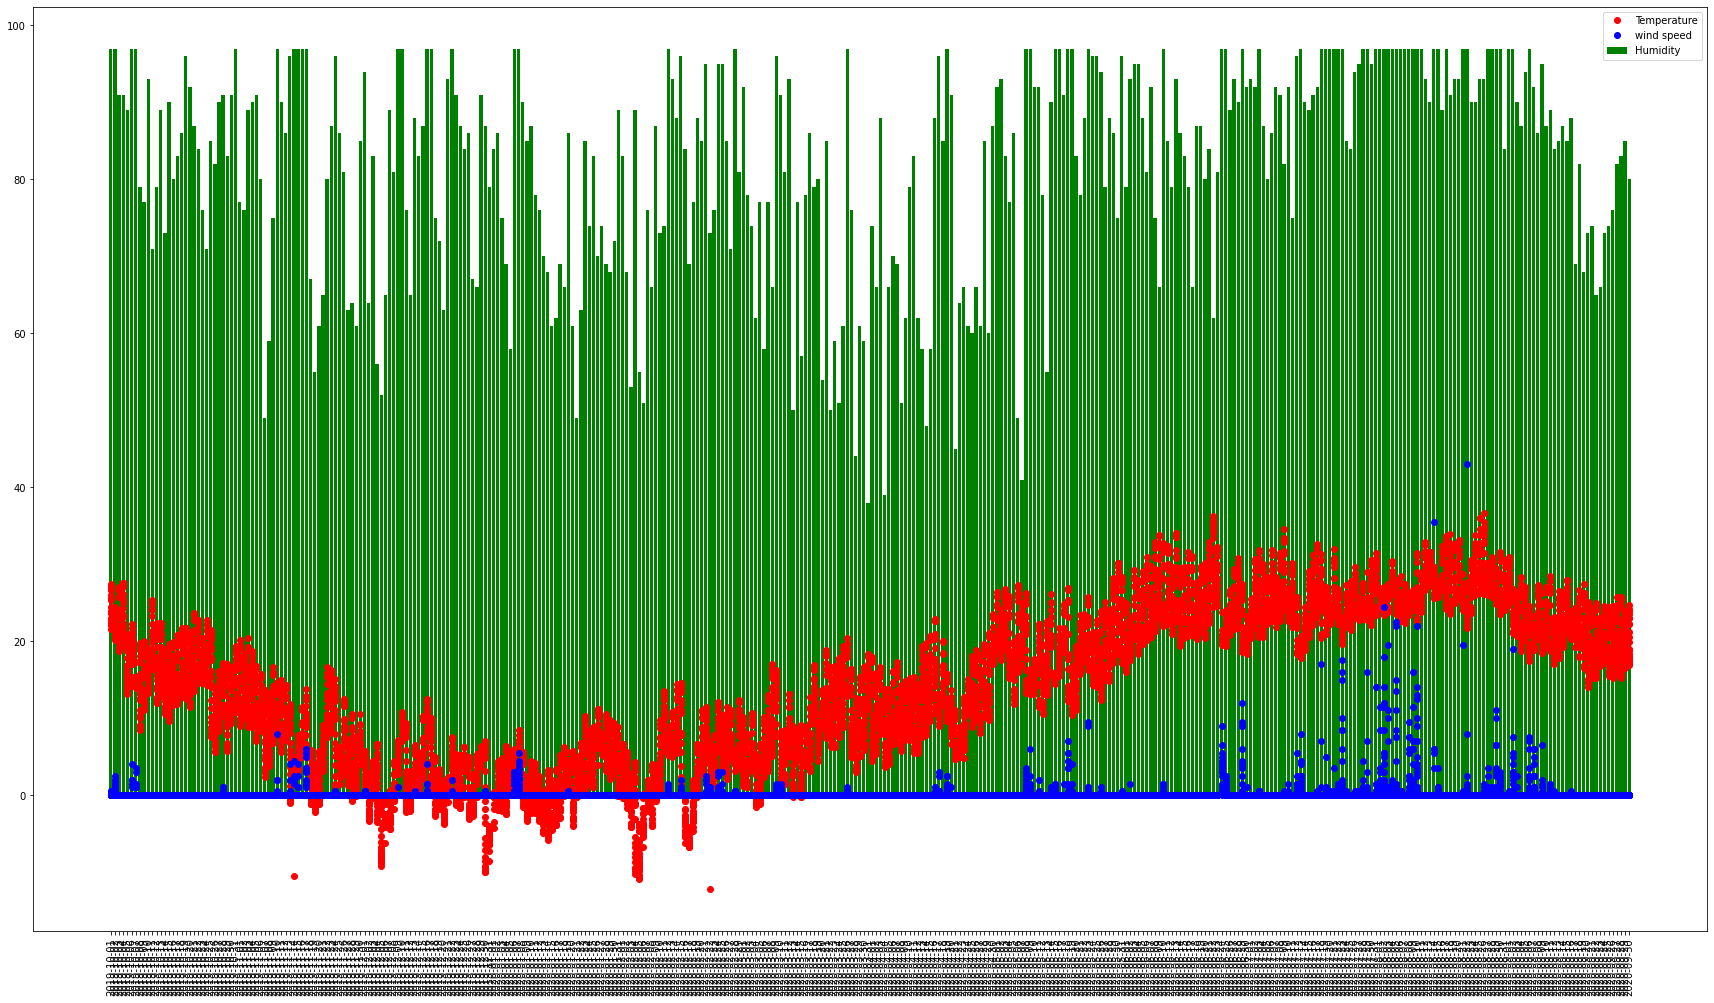

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(30, 17))

ax.bar(df['date'], df['humidity'], color='green', label='Humidity')
ax.plot_date(df['date'], df['temperature'], color='red', label='Temperature')
ax.plot_date(df['date'], df['precipitation'], color='blue', label='wind speed')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend()
# plt.gcf().autofmt_xdate()
plt.show()

- 10월 초, 11월 초, 1월 초, 5월 중순까지는 바람의 세기가 5ms 정도로 관측 됨.
- 6월 말에서 8월까지 10ms 풍속이 넘는 현상 관측
- 8월에 35ms 이상, 40ms가 넘는 풍속은 태풍으로 볼 수 있음.